# 形態素解析

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#形態素解析" data-toc-modified-id="形態素解析-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>形態素解析</a></span></li><li><span><a href="#Processing" data-toc-modified-id="Processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Processing</a></span><ul class="toc-item"><li><span><a href="#形態素解析結果の読み込み" data-toc-modified-id="形態素解析結果の読み込み-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>形態素解析結果の読み込み</a></span></li><li><span><a href="#動詞" data-toc-modified-id="動詞-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>動詞</a></span></li><li><span><a href="#動詞の基本形" data-toc-modified-id="動詞の基本形-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>動詞の基本形</a></span></li><li><span><a href="#「AのB」" data-toc-modified-id="「AのB」-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>「AのB」</a></span></li><li><span><a href="#名詞の連接Permalink" data-toc-modified-id="名詞の連接Permalink-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>名詞の連接Permalink</a></span></li></ul></li></ul></div>

夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

URL: https://nlp100.github.io/ja/

# Processing

## 形態素解析結果の読み込み

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [124]:
!pip install japanize-matplotlib

  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp37-none-any.whl size=4120280 sha256=ffe592ac53daed8683aa68ba20b29982a99f2a3bd66cc663be64636377fa5806
  Stored in directory: D:\Users\yoshiaki.tokuyama\AppData\Local\pip\Cache\wheels\b7\d9\a2\f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


In [1]:
# Run below on this cell
# !pip install --user mecab-python3
# !pip install --user unidic
# !pip install japanize-matplotlib

In [2]:
# Run below on jupyter terminal
# !python -m unidic download

In [125]:
import os, re
import MeCab
import unidic
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

In [4]:
os.listdir('../env/ref/')

['jawiki-country.json.gz', 'neko.txt']

In [5]:
with open('../env/ref/neko.txt', encoding='utf-8') as f:
    text = f.read()

In [6]:
len(text)
# -> 不用意にtextの全量を表示させないこと!

328721

In [7]:
text = text.split('\n')

In [8]:
text[:10]

['一',
 '',
 '\u3000吾輩は猫である。',
 '名前はまだ無い。',
 '',
 '\u3000どこで生れたかとんと見当がつかぬ。',
 '何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。',
 '吾輩はここで始めて人間というものを見た。',
 'しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ。',
 'この書生というのは時々我々を捕えて煮て食うという話である。']

In [9]:
# MeCabを試しに使ってみる
tagger = MeCab.Tagger()
sample_text = 'こんにちは。ぼくの名前は太郎。りんごをよく食べる。'
result = tagger.parse(sample_text)
print(result)

こんにちは	感動詞,一般,,,,,コンニチハ,今日は,こんにちは,コンニチワ,こんにちは,コンニチワ,混,,,,,,,他,コンニチハ,コンニチハ,コンニチハ,コンニチハ,5,,,37963946107478528,138112
。	補助記号,句点,,,,,,。,。,,。,,記号,,,,,,,補助,,,,,,,,6880571302400,25
ぼく	代名詞,,,,,,ボク,僕-代名詞,ぼく,ボク,ぼく,ボク,漢,,,,,,,体,ボク,ボク,ボク,ボク,1,0,,,9657019250385408,35132
の	助詞,格助詞,,,,,ノ,の,の,ノ,の,ノ,和,,,,,,,格助,ノ,ノ,ノ,ノ,,名詞%F1,,7968444268028416,28989
名前	名詞,普通名詞,一般,,,,ナマエ,名前,名前,ナマエ,名前,ナマエ,和,,,,,,,体,ナマエ,ナマエ,ナマエ,ナマエ,0,C2,,7684770268062208,27957
は	助詞,係助詞,,,,,ハ,は,は,ワ,は,ワ,和,,,,,,,係助,ハ,ハ,ハ,ハ,,動詞%F2@0,名詞%F1,形容詞%F2@-1,,8059703733133824,29321
太郎	名詞,固有名詞,人名,名,,,タロウ,タロウ,太郎,タロー,太郎,タロー,固,,,,,,,名,タロウ,タロウ,タロウ,タロウ,1,,,6252931250790912,22748
。	補助記号,句点,,,,,,。,。,,。,,記号,,,,,,,補助,,,,,,,,6880571302400,25
りんご	名詞,普通名詞,一般,,,,リンゴ,林檎,りんご,リンゴ,りんご,リンゴ,漢,,,,,,,体,リンゴ,リンゴ,リンゴ,リンゴ,0,C2,,11102602163003904,40391
を	助詞,格助詞,,,,,ヲ,を,を,オ,を,オ,和,,,,,,,格助,ヲ,ヲ,ヲ,ヲ,,動詞%F2@0,名詞%F1,形容詞%F2@-1,,11381878116459008,41407
よく	副詞,,,,,,ヨク,良く,よく,ヨク,よく,ヨク,和,,,,,,,相,ヨク,ヨク,ヨク,ヨク,1,,,10770283363443200,39182
食べる	動詞,一般,,,下一段-バ行,終止形-一般,タベル,食べる,食べる,タベル,食べる,タベル,和,,,,,,,用,

In [10]:
# Trial
word='この	連体詞,,,,,,コノ,此の,この,コノ,この,コノ,和,,,,,,,相,コノ,コノ,コノ,コノ,0,,,3547308012741120,12905'
morpheme = re.sub(r'\t| ',",", word).replace('　', ',').split(',')

surface = morpheme[0]
base = morpheme[7]
pos  = morpheme[1]
pos1 = morpheme[2]

print(morpheme)
print(f'{surface}/{base}/{pos}/{pos1}')

['この', '連体詞', '', '', '', '', '', 'コノ', '此の', 'この', 'コノ', 'この', 'コノ', '和', '', '', '', '', '', '', '相', 'コノ', 'コノ', 'コノ', 'コノ', '0', '', '', '3547308012741120', '12905']
この/コノ/連体詞/


In [11]:
# Trial
line = '吾輩は猫である。'
line_parsed = tagger.parse(line)

for word in line_parsed.split('\n'):
    print('*'*10)
    
    morpheme = re.sub(r'\t| ',",", word).replace('　', ',').split(',')
    
    if len(morpheme) == 1:
        continue
    
    surface = morpheme[0]
    base = morpheme[8]
    pos  = morpheme[1]
    pos1 = morpheme[2]

    print(morpheme)
    print(f'{surface}/{base}/{pos}/{pos1}')
    
# Q: 「ある」の原型って「有る」なのか？

**********
['吾輩', '代名詞', '', '', '', '', '', 'ワガハイ', '我が輩', '吾輩', 'ワガハイ', '吾輩', 'ワガハイ', '混', '', '', '', '', '', '', '体', 'ワガハイ', 'ワガハイ', 'ワガハイ', 'ワガハイ', '0', '', '', '11321954766299648', '41189']
吾輩/我が輩/代名詞/
**********
['は', '助詞', '係助詞', '', '', '', '', 'ハ', 'は', 'は', 'ワ', 'は', 'ワ', '和', '', '', '', '', '', '', '係助', 'ハ', 'ハ', 'ハ', 'ハ', '', '動詞%F2@0', '名詞%F1', '形容詞%F2@-1', '', '8059703733133824', '29321']
は/は/助詞/係助詞
**********
['猫', '名詞', '普通名詞', '一般', '', '', '', 'ネコ', '猫', '猫', 'ネコ', '猫', 'ネコ', '和', '', '', '', '', '', '', '体', 'ネコ', 'ネコ', 'ネコ', 'ネコ', '1', 'C4', '', '7918141678166528', '28806']
猫/猫/名詞/普通名詞
**********
['で', '助動詞', '', '', '', '助動詞-ダ', '連用形-一般', 'ダ', 'だ', 'で', 'デ', 'だ', 'ダ', '和', '', '', '', '', '', '', '助動', 'デ', 'ダ', 'デ', 'ダ', '', '名詞%F1', '', '6299110739157633', '22916']
で/だ/助動詞/
**********
['ある', '動詞', '非自立可能', '', '', '五段-ラ行', '終止形-一般', 'アル', '有る', 'ある', 'アル', 'ある', 'アル', '和', '', '', '', '', '', '', '用', 'アル', 'アル', 'アル', 'アル', '1', 'C3', '', '334260158472875', 

In [12]:
line_parsed.replace('\t',',').split('\n')

['吾輩,代名詞,,,,,,ワガハイ,我が輩,吾輩,ワガハイ,吾輩,ワガハイ,混,,,,,,,体,ワガハイ,ワガハイ,ワガハイ,ワガハイ,0,,,11321954766299648,41189',
 'は,助詞,係助詞,,,,,ハ,は,は,ワ,は,ワ,和,,,,,,,係助,ハ,ハ,ハ,ハ,,動詞%F2@0,名詞%F1,形容詞%F2@-1,,8059703733133824,29321',
 '猫,名詞,普通名詞,一般,,,,ネコ,猫,猫,ネコ,猫,ネコ,和,,,,,,,体,ネコ,ネコ,ネコ,ネコ,1,C4,,7918141678166528,28806',
 'で,助動詞,,,,助動詞-ダ,連用形-一般,ダ,だ,で,デ,だ,ダ,和,,,,,,,助動,デ,ダ,デ,ダ,,名詞%F1,,6299110739157633,22916',
 'ある,動詞,非自立可能,,,五段-ラ行,終止形-一般,アル,有る,ある,アル,ある,アル,和,,,,,,,用,アル,アル,アル,アル,1,C3,,334260158472875,1216',
 '。,補助記号,句点,,,,,,。,。,,。,,記号,,,,,,,補助,,,,,,,,6880571302400,25',
 'EOS',
 '']

In [13]:
for line in text[:10]:
    print('*'*100)
    print(line)

****************************************************************************************************
一
****************************************************************************************************

****************************************************************************************************
　吾輩は猫である。
****************************************************************************************************
名前はまだ無い。
****************************************************************************************************

****************************************************************************************************
　どこで生れたかとんと見当がつかぬ。
****************************************************************************************************
何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。
****************************************************************************************************
吾輩はここで始めて人間というものを見た。
********************************************************************************************

In [14]:
type(re.sub('1','2', 'aaa'))

str

In [15]:
len(morpheme)

1

In [16]:
for word in line_parsed.split('\n'):
    print(word)
    morpheme = re.sub(r'\t| ',",", word).replace('　', ',').split(',')
    print(morpheme)

吾輩	代名詞,,,,,,ワガハイ,我が輩,吾輩,ワガハイ,吾輩,ワガハイ,混,,,,,,,体,ワガハイ,ワガハイ,ワガハイ,ワガハイ,0,,,11321954766299648,41189
['吾輩', '代名詞', '', '', '', '', '', 'ワガハイ', '我が輩', '吾輩', 'ワガハイ', '吾輩', 'ワガハイ', '混', '', '', '', '', '', '', '体', 'ワガハイ', 'ワガハイ', 'ワガハイ', 'ワガハイ', '0', '', '', '11321954766299648', '41189']
は	助詞,係助詞,,,,,ハ,は,は,ワ,は,ワ,和,,,,,,,係助,ハ,ハ,ハ,ハ,,動詞%F2@0,名詞%F1,形容詞%F2@-1,,8059703733133824,29321
['は', '助詞', '係助詞', '', '', '', '', 'ハ', 'は', 'は', 'ワ', 'は', 'ワ', '和', '', '', '', '', '', '', '係助', 'ハ', 'ハ', 'ハ', 'ハ', '', '動詞%F2@0', '名詞%F1', '形容詞%F2@-1', '', '8059703733133824', '29321']
猫	名詞,普通名詞,一般,,,,ネコ,猫,猫,ネコ,猫,ネコ,和,,,,,,,体,ネコ,ネコ,ネコ,ネコ,1,C4,,7918141678166528,28806
['猫', '名詞', '普通名詞', '一般', '', '', '', 'ネコ', '猫', '猫', 'ネコ', '猫', 'ネコ', '和', '', '', '', '', '', '', '体', 'ネコ', 'ネコ', 'ネコ', 'ネコ', '1', 'C4', '', '7918141678166528', '28806']
で	助動詞,,,,助動詞-ダ,連用形-一般,ダ,だ,で,デ,だ,ダ,和,,,,,,,助動,デ,ダ,デ,ダ,,名詞%F1,,6299110739157633,22916
['で', '助動詞', '', '', '', '助動詞-ダ', '連用形-一般', 'ダ', 'だ', 'で', 'デ', 'だ', 'ダ', '和', '', '', '', '', ''

In [17]:
for line in text[:10]:
    print(line)

一

　吾輩は猫である。
名前はまだ無い。

　どこで生れたかとんと見当がつかぬ。
何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。
吾輩はここで始めて人間というものを見た。
しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ。
この書生というのは時々我々を捕えて煮て食うという話である。


In [18]:
def create_morpheme_list(text, is_test=False):
    
    if is_test:
        text = text[:300]
    
    morpheme_list = []
    for line in text:
        print(line)
        line = re.sub(r'[ |　]', "", line)
        if line =='':
            print('Skipped')
            continue

        morpheme_list.append([])
        line_parsed = tagger.parse(line)
        
        
        for word in line_parsed.split('\n'):
            print(word)
            morpheme = re.sub(r'\t| ',",", word).replace('　', ',').split(',')

            if len(morpheme) == 1:
                continue

            surface = morpheme[0]
            base    = morpheme[8]
            pos     = morpheme[1]
            pos1    = morpheme[2]

            morpheme_list[-1].append({
                'surface': surface,
                'base': base,
                'pos': pos,
                'pos1': pos1
            })
            
            if is_test:
                print(f'{surface}/{base}/{pos}/{pos1}')
    
    return morpheme_list


In [19]:
# エラーを発見
morpheme_list = create_morpheme_list(text[200:215])

茶の木の根を一本一本嗅ぎながら、西側の杉垣のそばまでくると、枯菊を押し倒してその上に大きな猫が前後不覚に寝ている。
茶	名詞,普通名詞,一般,,,,チャ,茶,茶,チャ,茶,チャ,漢,チ濁,基本形,,,,,体,チャ,チャ,チャ,チャ,0,C3,,6494548930994688,23627
の	助詞,格助詞,,,,,ノ,の,の,ノ,の,ノ,和,,,,,,,格助,ノ,ノ,ノ,ノ,,名詞%F1,,7968444268028416,28989
木	名詞,普通名詞,一般,,,,キ,木,木,キ,木,キ,和,キ濁,基本形,,,,,体,キ,キ,キ,キ,1,C3,,2270225290633728,8259
の	助詞,格助詞,,,,,ノ,の,の,ノ,の,ノ,和,,,,,,,格助,ノ,ノ,ノ,ノ,,名詞%F1,,7968444268028416,28989
根	名詞,普通名詞,一般,,,,ネ,根,根,ネ,根,ネ,和,,,,,,,体,ネ,ネ,ネ,ネ,1,C3,,7904947471524352,28758
を	助詞,格助詞,,,,,ヲ,を,を,オ,を,オ,和,,,,,,,格助,ヲ,ヲ,ヲ,ヲ,,動詞%F2@0,名詞%F1,形容詞%F2@-1,,11381878116459008,41407
一	名詞,数詞,,,,,イチ,一,一,イッ,一,イッ,漢,,,チ促,促音形,N1,,数,イッ,イッ,イッ,イチ,2,C3,,563508399973376,2050
本	接尾辞,名詞的,助数詞,,,,ホン,本,本,ポン,本,ポン,漢,ホ混合,半濁音形,,,,B1S6SjShS,B1S8SjShS,助数,ポン,ポン,ポン,ホン,,C3,,9584451482968576,34868
一	名詞,数詞,,,,,イチ,一,一,イッ,一,イッ,漢,,,チ促,促音形,N1,,数,イッ,イッ,イッ,イチ,2,C3,,563508399973376,2050
本	接尾辞,名詞的,助数詞,,,,ホン,本,本,ポン,本,ポン,漢,ホ混合,半濁音形,,,,B1S6SjShS,B1S8SjShS,助数,ポン,ポン,ポン,ホン,,C3,,9584451482968576,34868
嗅ぎ	動詞,一般,,,五段-ガ行,連用形-一般,カグ,嗅ぐ,嗅ぎ,カギ,嗅ぐ,カグ,和,,,,,,,用,カギ,カグ,カギ,カグ,0,C4,,171

吾輩	代名詞,,,,,,ワガハイ,我が輩,吾輩,ワガハイ,吾輩,ワガハイ,混,,,,,,,体,ワガハイ,ワガハイ,ワガハイ,ワガハイ,0,,,11321954766299648,41189
は	助詞,係助詞,,,,,ハ,は,は,ワ,は,ワ,和,,,,,,,係助,ハ,ハ,ハ,ハ,,動詞%F2@0,名詞%F1,形容詞%F2@-1,,8059703733133824,29321
嘆賞	名詞,普通名詞,サ変可能,,,,タンショウ,嘆賞,嘆賞,タンショー,嘆賞,タンショー,漢,,,,,,,体,タンショウ,タンショウ,タンショウ,タンショウ,0,C2,,6273547127366144,22823
の	助詞,格助詞,,,,,ノ,の,の,ノ,の,ノ,和,,,,,,,格助,ノ,ノ,ノ,ノ,,名詞%F1,,7968444268028416,28989
念	名詞,普通名詞,一般,,,,ネン,念,念,ネン,念,ネン,漢,,,,,,,体,ネン,ネン,ネン,ネン,0,1,C3,,7951951593611776,28929
と	助詞,格助詞,,,,,ト,と,と,ト,と,ト,和,,,,,,,格助,ト,ト,ト,ト,,名詞%F1,動詞%F1,形容詞%F2@-1,,7099014038299136,25826
、	補助記号,読点,,,,,,、,、,,、,,記号,,,,,,,補助,,,,,,,,6605693395456,24
好奇	名詞,普通名詞,一般,,,,コウキ,好奇,好奇,コーキ,好奇,コーキ,漢,,,,,,,体,コウキ,コウキ,コウキ,コウキ,1,C1,,3285349367423488,11952
の	助詞,格助詞,,,,,ノ,の,の,ノ,の,ノ,和,,,,,,,格助,ノ,ノ,ノ,ノ,,名詞%F1,,7968444268028416,28989
心	名詞,普通名詞,サ変可能,,,,ココロ,心,心,ココロ,心,ココロ,和,コ濁,基本形,,,,,体,ココロ,ココロ,ココロ,ココロ,2,3,C1,,3467593453281792,12615
に	助詞,格助詞,,,,,ニ,に,に,ニ,に,ニ,和,,,,,,,格助,ニ,ニ,ニ,ニ,,名詞%F1,,7745518285496832,28178
前後	名詞,普通名詞,副詞可能,,,,ゼンゴ,前後,前後,ゼンゴ,前後,ゼンゴ,漢,,,,,,,体,ゼンゴ

IndexError: list index out of range

In [20]:
line_parsed.split('\n')

['吾輩\t代名詞,,,,,,ワガハイ,我が輩,吾輩,ワガハイ,吾輩,ワガハイ,混,,,,,,,体,ワガハイ,ワガハイ,ワガハイ,ワガハイ,0,,,11321954766299648,41189',
 'は\t助詞,係助詞,,,,,ハ,は,は,ワ,は,ワ,和,,,,,,,係助,ハ,ハ,ハ,ハ,,動詞%F2@0,名詞%F1,形容詞%F2@-1,,8059703733133824,29321',
 '猫\t名詞,普通名詞,一般,,,,ネコ,猫,猫,ネコ,猫,ネコ,和,,,,,,,体,ネコ,ネコ,ネコ,ネコ,1,C4,,7918141678166528,28806',
 'で\t助動詞,,,,助動詞-ダ,連用形-一般,ダ,だ,で,デ,だ,ダ,和,,,,,,,助動,デ,ダ,デ,ダ,,名詞%F1,,6299110739157633,22916',
 'ある\t動詞,非自立可能,,,五段-ラ行,終止形-一般,アル,有る,ある,アル,ある,アル,和,,,,,,,用,アル,アル,アル,アル,1,C3,,334260158472875,1216',
 '。\t補助記号,句点,,,,,,。,。,,。,,記号,,,,,,,補助,,,,,,,,6880571302400,25',
 'EOS',
 '']

In [21]:
len('挫\t名詞,普通名詞,一般,,,'.replace('\t', ',').split(','))

7

In [22]:
# Trial
line='大王にしては少々言葉が卑しいと思ったが何しろその声の底に犬をも挫しぐべき力が籠っているので吾輩は少なからず恐れを抱いた。'

line_parsed = tagger.parse(line)

for word in line_parsed.split('\n'):
    print('*'*10)
    
    morpheme = re.sub(r'\t| ',",", word).replace('　', ',').split(',')
    
    if len(morpheme) < 1:
        continue
    
    surface = morpheme[0]
    base = morpheme[8]
    pos  = morpheme[1]
    pos1 = morpheme[2]

    print(morpheme)
    print(f'{surface}/{base}/{pos}/{pos1}')
    
# Q: 「ある」の原型って「有る」なのか？

**********
['大王', '名詞', '普通名詞', '一般', '', '', '', 'ダイオウ', '大王', '大王', 'ダイオー', '大王', 'ダイオー', '漢', '', '', '', '', '', '', '体', 'ダイオウ', 'ダイオウ', 'ダイオウ', 'ダイオウ', '3', 'C2', '', '6309006343807488', '22952']
大王/大王/名詞/普通名詞
**********
['に', '助詞', '格助詞', '', '', '', '', 'ニ', 'に', 'に', 'ニ', 'に', 'ニ', '和', '', '', '', '', '', '', '格助', 'ニ', 'ニ', 'ニ', 'ニ', '', '名詞%F1', '', '7745518285496832', '28178']
に/に/助詞/格助詞
**********
['し', '動詞', '非自立可能', '', '', 'サ行変格', '連用形-一般', 'スル', '為る', 'し', 'シ', 'する', 'スル', '和', '', '', '', '', '', '', '用', 'シ', 'スル', 'シ', 'スル', '0', 'C5', '', '5370298291593857', '19537']
し/為る/動詞/非自立可能
**********
['て', '助詞', '接続助詞', '', '', '', '', 'テ', 'て', 'て', 'テ', 'て', 'テ', '和', '', '', '', '', '', '', '接助', 'テ', 'テ', 'テ', 'テ', '', '動詞%F1', '形容詞%F2@-1', '', '6837321680953856', '24874']
て/て/助詞/接続助詞
**********
['は', '助詞', '係助詞', '', '', '', '', 'ハ', 'は', 'は', 'ワ', 'は', 'ワ', '和', '', '', '', '', '', '', '係助', 'ハ', 'ハ', 'ハ', 'ハ', '', '動詞%F2@0', '名詞%F1', '形容詞%F2@-1', '', '80597037331338

IndexError: list index out of range

In [23]:
def create_morpheme_list(text, is_test=False):
    
    if is_test:
        text = text[:300]
    
    morpheme_list = []
    for line in text:
        line = re.sub(r'[ |　]', "", line)
        if line =='':
            continue

        morpheme_list.append([])
        line_parsed = tagger.parse(line)
        
        
        for word in line_parsed.split('\n'):
            morpheme = re.sub(r'\t| ',",", word).replace('　', ',').split(',')

            
            
            # TODO: Fix
            if len(morpheme) < 8:
                continue

            surface = morpheme[0]
            base    = morpheme[8]
            pos     = morpheme[1]
            pos1    = morpheme[2]

            morpheme_list[-1].append({
                'surface': surface,
                'base': base,
                'pos': pos,
                'pos1': pos1
            })
            
            if is_test:
                print(f'{surface}/{base}/{pos}/{pos1}')
    
    return morpheme_list


In [24]:
morpheme_list = create_morpheme_list(text)

In [25]:
morpheme_list[:10]

[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数詞'}],
 [{'surface': '吾輩', 'base': '我が輩', 'pos': '代名詞', 'pos1': ''},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '普通名詞'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': ''},
  {'surface': 'ある', 'base': '有る', 'pos': '動詞', 'pos1': '非自立可能'},
  {'surface': '。', 'base': '。', 'pos': '補助記号', 'pos1': '句点'}],
 [{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '普通名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': '未だ', 'pos': '副詞', 'pos1': ''},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '非自立可能'},
  {'surface': '。', 'base': '。', 'pos': '補助記号', 'pos1': '句点'}],
 [{'surface': 'どこ', 'base': '何処', 'pos': '代名詞', 'pos1': ''},
  {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'},
  {'surface': '生れ', 'base': '生まれる', 'pos': '動詞', 'pos1': '一般'},
  {'surface': 'た', 'base': 'た', 'pos': '助動詞', 'pos1': ''},
  {'surf

In [26]:
morpheme_list[-10:]

[[{'surface': '水', 'base': '水', 'pos': '名詞', 'pos1': '普通名詞'},
  {'surface': 'の', 'base': 'の', 'pos': '助詞', 'pos1': '格助詞'},
  {'surface': '中', 'base': '中', 'pos': '名詞', 'pos1': '普通名詞'},
  {'surface': 'に', 'base': 'に', 'pos': '助詞', 'pos1': '格助詞'},
  {'surface': 'いる', 'base': '居る', 'pos': '動詞', 'pos1': '非自立可能'},
  {'surface': 'の', 'base': 'の', 'pos': '助詞', 'pos1': '準体助詞'},
  {'surface': 'だ', 'base': 'だ', 'pos': '助動詞', 'pos1': ''},
  {'surface': 'か', 'base': 'か', 'pos': '助詞', 'pos1': '副助詞'},
  {'surface': '、', 'base': '、', 'pos': '補助記号', 'pos1': '読点'},
  {'surface': '座敷', 'base': '座敷', 'pos': '名詞', 'pos1': '普通名詞'},
  {'surface': 'の', 'base': 'の', 'pos': '助詞', 'pos1': '格助詞'},
  {'surface': '上', 'base': '上', 'pos': '名詞', 'pos1': '普通名詞'},
  {'surface': 'に', 'base': 'に', 'pos': '助詞', 'pos1': '格助詞'},
  {'surface': 'いる', 'base': '居る', 'pos': '動詞', 'pos1': '非自立可能'},
  {'surface': 'の', 'base': 'の', 'pos': '助詞', 'pos1': '準体助詞'},
  {'surface': 'だ', 'base': 'だ', 'pos': '助動詞', 'pos1': ''},
  {'surface

Ref
- https://www.atmarkit.co.jp/ait/articles/2102/05/news027.html
- https://taku910.github.io/mecab/#parse


わからないところ:
-  MeCabによるparseの結果「'挫\t名詞,普通名詞,一般,,,',」と出力される箇所があり、言葉の原型がわからないため処理をうまく通せない。本来どう実装するべき？

## 動詞

動詞の表層形をすべて抽出せよ．

In [27]:
# Test
output=[]
for words in morpheme_list[:10]:
    for morpheme in words:
        if morpheme['pos']=='動詞':
            output.append(morpheme['surface'])


In [28]:
len(output)

27

In [29]:
output

['ある',
 '生れ',
 'つか',
 'し',
 '泣い',
 'い',
 'し',
 'いる',
 '始め',
 'いう',
 '見',
 '聞く',
 'いう',
 'あっ',
 'いう',
 '捕え',
 '煮',
 '食う',
 'いう',
 'ある',
 'いう',
 '思わ',
 '載せ',
 '持ち上げ',
 'し',
 'あっ',
 'ある']

In [31]:
# 本実行
output=[]
for words in morpheme_list:
    for morpheme in words:
        if morpheme['pos']=='動詞':
            output.append(morpheme['surface'])


In [32]:
len(output)

29345

In [33]:
output[:10]

['ある', '生れ', 'つか', 'し', '泣い', 'い', 'し', 'いる', '始め', 'いう']

In [34]:
output[-10:]

['感じ', '得', '切り落し', 'し', '入る', '死ぬ', '死ん', '得る', '死な', '得']

## 動詞の基本形

動詞の基本形をすべて抽出せよ．

In [35]:
# 本実行
output=[]
for words in morpheme_list:
    for morpheme in words:
        if morpheme['pos']=='動詞':
            output.append(morpheme['base'])

In [36]:
len(output)

29345

In [37]:
output[:10]

['有る', '生まれる', '付く', '為る', '泣く', '居る', '為る', '居る', '始める', '言う']

In [38]:
output[-10:]

['感ずる', '得る', '切り落とす', '為る', '入る', '死ぬ', '死ぬ', '得る', '死ぬ', '得る']

Ref
- https://ohshige.hatenablog.com/entry/2019/05/27/190000
  - 微妙に↑ のサイトと出力結果が異なる..

## 「AのB」

2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [39]:
words

[{'surface': 'ありがたい', 'base': '有り難い', 'pos': '形容詞', 'pos1': '一般'},
 {'surface': 'ありがたい', 'base': '有り難い', 'pos': '形容詞', 'pos1': '一般'},
 {'surface': '。', 'base': '。', 'pos': '補助記号', 'pos1': '句点'}]

In [40]:
output=[]
for words in morpheme_list:
#     print(words)
#     print('*'*40)
    for i, _ in enumerate(words):
#         print(i)
        if i > len(words)-3:
            continue
        
#         print(
#             words[i]['pos'],
#             words[i+1]['surface'],
#             words[i+2]['pos']
#         )        
        if((words[i]['pos']=='名詞') & (words[i+1]['surface']=='の') & (words[i+2]['pos']=='名詞')):
            output.append(words[i]['surface'] +'の' + words[i+2]['surface'])

In [41]:
len(output)

4722

In [42]:
output[:10]

['掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '藁の上', '笹原の中', '池の前']

In [43]:
output[-10:]

['烏の勘', '烏の代り', '水の面', '甕の縁', '甕のふち', '年の間', '自然の力', '水の中', '座敷の上', '不可思議の太平']

## 名詞の連接

名詞の連接（連続して出現する名詞）を最長一致で抽出せよ

In [44]:
morpheme_list[:10][2]

[{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '普通名詞'},
 {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
 {'surface': 'まだ', 'base': '未だ', 'pos': '副詞', 'pos1': ''},
 {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '非自立可能'},
 {'surface': '。', 'base': '。', 'pos': '補助記号', 'pos1': '句点'}]

In [45]:
output=[]
# for words in morpheme_list[:10]:
for words in morpheme_list:
    #     print('*'*40)
    #     print(words)
    i = 0
    start, end = -999, -999 # 初期化。名詞の検出中は両者とも非負整数を取る。
    while True:
        if i >= len(words):
            break
        elif (words[i]['pos'] =='名詞'):
            if start >=0 :
                # 連鎖がすでに開始されていた場合はendを更新する
                end = i
            else:
                # 連鎖が開始されていなかった場合はカウントを開始させる
                start=i    
        else:
            if start >= 0: 
                # print('HIT')
                # 連鎖のカウント中だった場合は連鎖を終了させる
                end = i-1
                output.append([k['surface'] for k in words[start:end+1] ] )
            
                # print(start,end)
                
                # 初期化
                start, end = -999, -999
        
        i +=1
        
output = [''.join(k) for k in output]

In [46]:
len(output)

40385

In [47]:
output[:10]

['猫', '名前', '見当', '所', '事', '記憶', '人間', 'もの', 'あと', '書生']

In [48]:
output[-10:]

['否', 'もの', '日月', '天地', '粉', '不可思議', '太平', '太平', '太平', '南無阿弥陀仏南無阿弥陀仏']

In [49]:
import numpy as np

In [50]:
# c.f. 最長文字列
output[np.argmax([len(k) for k in output])]

'チーン南無猫誉信女南無阿弥陀仏南無阿弥陀仏'

## 単語の出現頻度

In [56]:
100%2

0

In [70]:
print(f'{3:a<7}')

3aaaaaa


In [77]:
morpheme_list[1]

[{'surface': '吾輩', 'base': '我が輩', 'pos': '代名詞', 'pos1': ''},
 {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
 {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '普通名詞'},
 {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': ''},
 {'surface': 'ある', 'base': '有る', 'pos': '動詞', 'pos1': '非自立可能'},
 {'surface': '。', 'base': '。', 'pos': '補助記号', 'pos1': '句点'}]

In [78]:
len(morpheme_list)

9210

In [134]:
(1==1) & (2==2)

True

In [145]:
def get_word_freq_list(morpheme_list, flg_sorted=True, flg_only_noun=False):
    print(f'INPUT: {len(morpheme_list): <6} sentences')
    
    word_freq_dict = {}
    for i, morphemes in enumerate(morpheme_list):
        
        for morpheme in morphemes:
            # Decide if only noun is considered as word or not
            if flg_only_noun==True:
                noun_condition = (morpheme['pos'] == '名詞')
            else:
                noun_condition=True
            
            if (morpheme['base'] in word_freq_dict) & noun_condition:
                word_freq_dict[ morpheme['base'] ] += 1
            else:
                word_freq_dict[ morpheme['base'] ] = 1
        if i % 1000 == 0:
            print(f'{i: <5} sentences passed.')
    
    if flg_sorted:
        word_freq = sorted(word_freq_dict.items(), key=lambda x:x[1], reverse=True)
    else:
        word_freq = word_freq_dict.items()
        
    return word_freq
    

In [146]:
all_words_freq_list =  get_word_freq_list(morpheme_list)

INPUT: 9210   sentences
0     sentences passed.
1000  sentences passed.
2000  sentences passed.
3000  sentences passed.
4000  sentences passed.
5000  sentences passed.
6000  sentences passed.
7000  sentences passed.
8000  sentences passed.
9000  sentences passed.


In [147]:
len(all_words_freq_list)

10548

In [148]:
all_words_freq_list[:5]

[('の', 10263), ('だ', 8138), ('て', 7888), ('。', 7486), ('、', 6773)]

In [149]:
noun_freq_list =  get_word_freq_list(morpheme_list, flg_only_noun=True)

INPUT: 9210   sentences
0     sentences passed.
1000  sentences passed.
2000  sentences passed.
3000  sentences passed.
4000  sentences passed.
5000  sentences passed.
6000  sentences passed.
7000  sentences passed.
8000  sentences passed.
9000  sentences passed.


In [150]:
len(noun_freq_list)

10548

In [151]:
noun_freq_list[:5]

[('事', 1136), ('主人', 934), ('一', 480), ('時', 392), ('メイテイ', 343)]

## 頻度上位10語

出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [155]:
# すべての単語
freq_words = all_words_freq_list[:10]

In [156]:
[k[0] for k in freq_words]

['の', 'だ', 'て', '。', '、', 'は', 'と', 'を', 'に', 'が']

In [158]:
[k[1] for k in freq_words]

[10263, 8138, 7888, 7486, 6773, 6512, 6156, 6119, 5738, 5395]

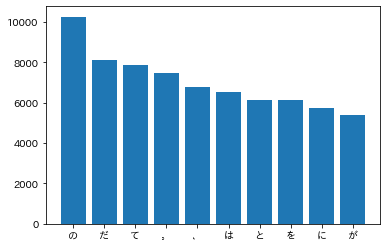

In [159]:
plt.bar([k[0] for k in freq_words], [k[1] for k in freq_words])
plt.show()

In [160]:
# 名詞だけに絞った場合
freq_words = noun_freq_list[:10]

In [164]:
[k[0] for k in freq_words]

['事', '主人', '一', '時', 'メイテイ', '人間', '顔', '先生', '寒月', '細君']

In [163]:
[k[1] for k in freq_words]

[1136, 934, 480, 392, 343, 279, 279, 274, 261, 260]

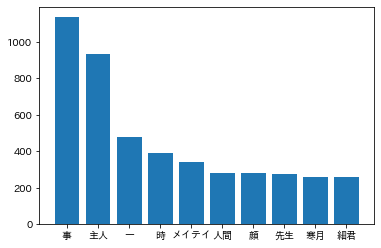

In [161]:
plt.bar([k[0] for k in freq_words], [k[1] for k in freq_words])
plt.show()

EoF